<h1>Part 2: Code Quiz<h1>

**Instruction**:
1. Please download the FoDS_Quiz_Part2.ipynb file and rename it with your studentid (e.g 123456789.ipynb)
2. Please submit your work in  ipynb file format into this link: https://forms.office.com/r/Sk3QKKYkaw
3. No cheating will be tolerated

### <b>Study Case</b>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model to predict if a patient has this disease or not. We will use SVC (SVM for classification) and 
Decision Tree (ID3) algorithms.

### Download the dataset from GitHub here: 
https://github.com/bagzcode/FoDS_quiz2.git


### <b>ABOUT DATASET: </b>

1. age
2. sex (1= Male, 0= Female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


The "AHD" field refers to the presence of heart disease in the patient, the value is No and Yes.


## Weight 10%

In [1150]:
#1 import all libraries required : (e.g: numpy and pandas, sklearn, matplotlib, etc)
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import  SVC
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns

In [1151]:
#2 Import dataset into variabel
url = 'https://raw.githubusercontent.com/Gitroars/FoDS_LEC/main/FoDS_quiz2-main/Quiz_Dataset.csv'
df = pd.read_csv(url)

In [1152]:
#3 shows attributes, number of data and the data types for each attributes 
# AHD is Acquired heart diseases ~ later will be used as "TARGET Class"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [1153]:
#4 remove column 'Unnamed: 0'
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [1154]:
#5 print 'Data First 5 Rows'
print(df.iloc[:5])

   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No  


In [1155]:
#6 print 'Data Last 5 Rows'
print(df.tail(5))

     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
298   45    1       typical     110   264    0        0    132      0   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   
302   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
298      1.2      2  0.0  reversable  Yes  
299      3.4      2  2.0  reversable  Yes  
300      1.2      2  1.0  reversable  Yes  
301      0.0      2  1.0      normal  Yes  
302      0.0      1  NaN      normal   No  


In [1156]:
#7 print the statistic of the dataset (count, mean, SD, min, max, etc )
df.describe(include='all')

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301,303
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,asymptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,No
freq,NaN,NaN,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166,164
mean,54.438944,0.679868,NaN,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,NaN,NaN
std,9.038662,0.467299,NaN,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,NaN,NaN
min,29.000000,0.000000,NaN,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,48.000000,0.000000,NaN,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
50%,56.000000,1.000000,NaN,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,NaN,NaN
75%,61.000000,1.000000,NaN,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,NaN,NaN


In [1157]:
#8 check null on all data and If data has null, show the sum of null data's
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [1158]:
#9 Try removing all the rows from the dataset that contain missing values. How many are left?
df1 = df.dropna()
df1.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

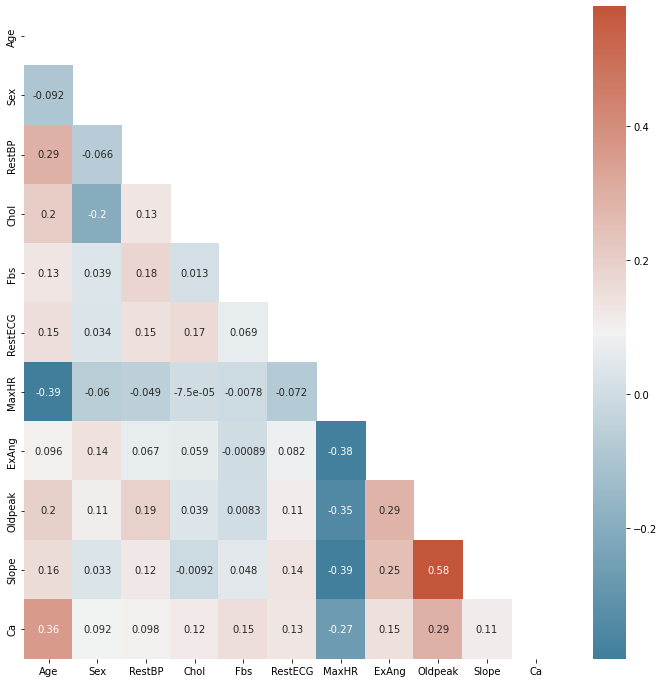

In [1159]:
#10 Show statistical correlation value from each column using SNS heatmap
correlations = df1.corr()
f, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(correlations,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(correlations,annot=True,mask=mask,cmap=cmap)


##*Lets* do some attribute analysis - Age Analysis (Weight 20%)



In [1160]:
#11 Print variance age data from dataset
print(df1.var()['Age'])

81.8977158977159


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [1161]:
#12 Please divide data into three groups: the elderly (>55yo),middle-aged(40-55yo), young(<40yo) people by looking at the age ranges.
df_elderly = df1[df1['Age']>55]
df_young = df1[df1['Age']<40]
df_middle = (df1['Age']>39) & (df1['Age']<55)

In [1162]:
#13 Show the data count for each age based on their groups: elderly, middle-aged, young people and please show it in a Bar Plot
df_elderly.count()

Age          151
Sex          151
ChestPain    151
RestBP       151
Chol         151
Fbs          151
RestECG      151
MaxHR        151
ExAng        151
Oldpeak      151
Slope        151
Ca           151
Thal         151
AHD          151
dtype: int64

In [1163]:
df_middle.count()

297

In [1164]:
df_young.count()

Age          14
Sex          14
ChestPain    14
RestBP       14
Chol         14
Fbs          14
RestECG      14
MaxHR        14
ExAng        14
Oldpeak      14
Slope        14
Ca           14
Thal         14
AHD          14
dtype: int64

In [1165]:
#14 add a new column 'AgeRange' and put the correct value based on the age category. Then plot a categorical scatterplot to show each observation. Your chart will show something like this
df1["AgeRange"] = pd.cut(x=df1['Age'],bins=[0,40,55,150], labels=["young","middle_aged","elderly"])
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AgeRange
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,elderly
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,elderly
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,elderly
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,young
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,middle_aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes,elderly
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,middle_aged
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,elderly
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,elderly


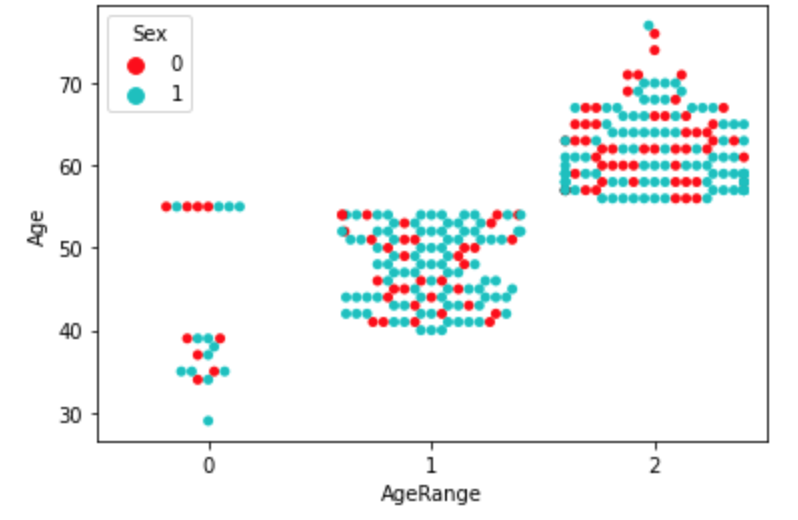

In [1166]:
#15 Show 'AgeRange' value distributions in a Pie Chart
# df['AgeRange'].value_counts().plot.pie(autopct='%.2f')

## **MODEL, TRAINING and TESTING (Weight 30%)**

As a result of our initial evaluations, we have used a number of artificial learning algorithms. support vector machine (SVM) and Decision Trees algorithms. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.

As is known, most of our data are categorized and not categorized only among certain feature values. We will perform scale operations to eliminate these situations.

In a data set, the data that are distant from each other are made to scale between each other by making a specific scaling. As a result of this operation, the data takes a value of 0.1. This may change in some scaling operations. Standard and Normalization scale will be used for our operation. There is a big change between the data obtained. Therefore, we need to use this method for SVM algorithm.

In [1167]:
#16 Some of the data is still in string, so we need to change it to numeric (ChestPain, Thal, and AHD)
df1['ChestPain'] = pd.to_numeric(df1['ChestPain'],errors='coerce')
df1['Thal'] = pd.to_numeric(df1['Thal'],errors='coerce')
df1['AHD'] = pd.to_numeric(df1['AHD'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [1168]:
#17 Please show the statistical correlation value (Hint: use function corr) amongst all the columns in the dataset
correlations = df1.corr()
print(correlations)

                Age       Sex  ChestPain    RestBP      Chol       Fbs  \
Age        1.000000 -0.092399        NaN  0.290476  0.202644  0.132062   
Sex       -0.092399  1.000000        NaN -0.066340 -0.198089  0.038850   
ChestPain       NaN       NaN        NaN       NaN       NaN       NaN   
RestBP     0.290476 -0.066340        NaN  1.000000  0.131536  0.180860   
Chol       0.202644 -0.198089        NaN  0.131536  1.000000  0.012708   
Fbs        0.132062  0.038850        NaN  0.180860  0.012708  1.000000   
RestECG    0.149917  0.033897        NaN  0.149242  0.165046  0.068831   
MaxHR     -0.394563 -0.060496        NaN -0.049108 -0.000075 -0.007842   
ExAng      0.096489  0.143581        NaN  0.066691  0.059339 -0.000893   
Oldpeak    0.197123  0.106567        NaN  0.191243  0.038596  0.008311   
Slope      0.159405  0.033345        NaN  0.121172 -0.009215  0.047819   
Ca         0.362210  0.091925        NaN  0.097954  0.115945  0.152086   
Thal            NaN       NaN        N

The diagonal values we see in these correlation values are always 1.0. That doesn't mean much to us. The minus value is a big problem, but the value of the transactions are more valuable for us.

In [1169]:
#18 Please normalize the data (hint: use StandardScaler)
# df1_max_scs

The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [1170]:
#19 Split dataset into two subsets: train and test sets (Train: 67%, Test: 33%)


## Optional steps for Extra Point (additional extra point Weight 20%)




This is ***OPTIONAL STEPs*** to improve accuracy of your model

 implement PCA to the data set.

But, before that, I will investigate the explained variance ratio and resulting principal components:

In [1171]:
#* investigate the explained variance ratio and resulting principal components


In [1172]:
#* apply PCA to the data with number of components = 8 for X_train


In [1173]:
#* apply PCA to the data with number of components = 8 for X_test


According to the principal components, data points with greater values on the x-axis represent the customers that are less likely to spend to Detergents_Paper category.

Likewise, data points with greater values on the y-axis represent the customers that are less likely to spend to Fresh and Frozen categories.

Now, you can constitute a DataFrame out of my reduced data with two dimensions:

In [1174]:
#*  create combine feature list for training the model based on reduced data (optional steps that can be used for training SVM and Decision Tree Models)


##Lets create the training Model and test the performance

**SVM**

In [1175]:
# Please import all required library for SVM (Classification)


In [1176]:
# 20 
# Build an SVM model, train it on train data and test it on test data. Please print Train Classification Report and Confusion Matrix.
# Don't forget to setup random_state to compare the same data with other model later (Decision Tree)


**Decision Tree**

In [1177]:
# Please import all required library for DecisionTreeClassifier 

In [1178]:
# 21 
# Build a Decision Tree model, train it on train data and test it on test data. Please print Train Classification Report and Confusion Matrix.
# Don't forget to setup same random_state 

**Last thing, What you could conclude with this analysis?**

Please type and summarize your finding from these model performance here